In [1]:
# This notebook displays the displacements at CUUT00THA MGEX station 
# with respect to the first day of operation (i.e. Jan 14, 2015)
#
# copyright: Octavian Andrei, 2017-2020

In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# other general settings
sns.set(context='paper', style='ticks', font_scale=1.5)

## Input data 

In [4]:
# daily PPP solutions, standard deviations and ENU displacements wrt to first day of operation
url = "https://www.dropbox.com/preview/Share_with_mac/script/lab01/cuutAll.txt"
url = 'cuutENU.txt'
df = pd.read_csv(url, comment='%', delim_whitespace=True, parse_dates=['DATE'], index_col=['DATE'])
df.sort_index(inplace=True)
df.tail()

,LAT,LON,ELLHGT,SDLAT,SDLON,SDHGT,EAST,NORTH,UP
DATE,,,,,,,,,
2020-03-27,13.735991,100.533936,74.304,0.0016,0.0024,0.0050,0.124922,-0.053217,0.008
2020-03-28,13.735991,100.533936,74.307,0.0024,0.0036,0.0077,0.117135,-0.053770,0.011
2020-03-29,13.735991,100.533936,74.313,0.0016,0.0028,0.0051,0.118324,-0.051889,0.017
2020-03-30,13.735991,100.533936,74.310,0.0016,0.0025,0.0051,0.122002,-0.052885,0.014
2020-03-31,13.735991,100.533936,74.312,0.0015,0.0025,0.0051,0.115945,-0.052885,0.016


In [5]:
# interval
df.index.min(), df.index.max()

(Timestamp('2015-01-14 00:00:00'), Timestamp('2020-03-31 00:00:00'))

In [6]:
# general statistics
df[['EAST', 'NORTH', 'UP']].describe()

,EAST,NORTH,UP
count,1890.000000,1890.000000,1890.000000
mean,0.059803,-0.028486,0.007392
std,0.037850,0.016550,0.009471
min,-0.013195,-0.060187,-0.045000
25%,0.026715,-0.041489,0.002000
50%,0.063705,-0.027328,0.007000
75%,0.091934,-0.013830,0.014000
max,0.133683,0.003651,0.061000


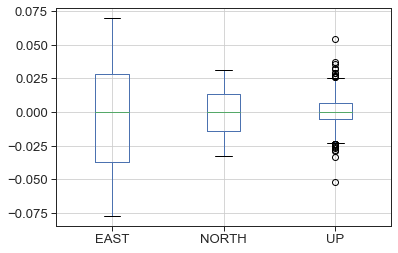

In [7]:
# quick visualisations
X = df[['EAST', 'NORTH', 'UP']] - df[['EAST', 'NORTH', 'UP']].median()
X.boxplot()

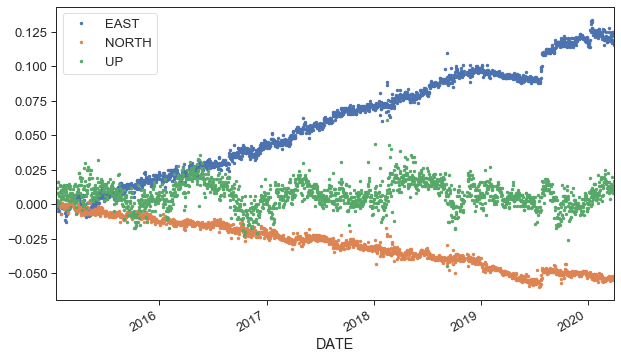

In [8]:
# time-wise
df[['EAST', 'NORTH', 'UP']].plot(figsize=(10,6), marker='.', ls='None')

## Static plot

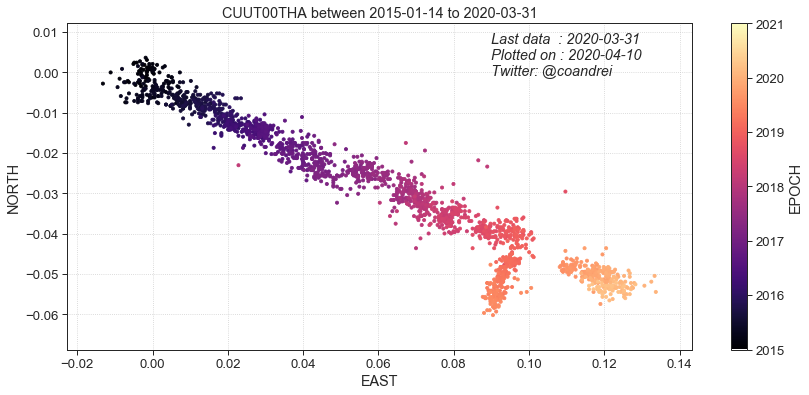

In [9]:
# let's use a color map to better visualise the change from one day to another
df['EPOCH'] = df.index.map(lambda x: x.year+x.dayofyear/366.0)
df.tail()
vmin, vmax = df.index.min().year, df.index.max().year+1

# create a new figure
fig6, ax = plt.subplots()

# plot
df.plot(x="EAST",             # put EAST on the x axis
        y="NORTH",            # put NORTH on the y axis
        kind="scatter",       # create a scatter plot
        ax=ax,                # draw on a previous plot
        figsize=(14,6),       # figure size
        grid=True,            # show the grid
        s=10,                 # marker size
        c="EPOCH",            # colour change according to EPOCH column
        cmap=plt.cm.magma,  # colour map
        vmin=vmin,            # lower limit for the colour map
        vmax=vmax)

# customise settings
tbeg = df.index[0].strftime("%Y-%m-%d")
tend = df.index[-1].strftime("%Y-%m-%d")
tnow = pd.datetime.now().strftime("%Y-%m-%d")
text = "Last data  : {}\nPlotted on : {}\nTwitter: @coandrei"

ax.text(0.09,0.01,#-0.018,-0.0155, #
        text.format(tend, tnow),
        ha='left', va='top', 
        fontstyle='italic')
ax.set_title("CUUT00THA between {} to {}".format(tbeg, tend))
ax.grid(linestyle=':')

## Animation plot

2015 735613 2021 1890


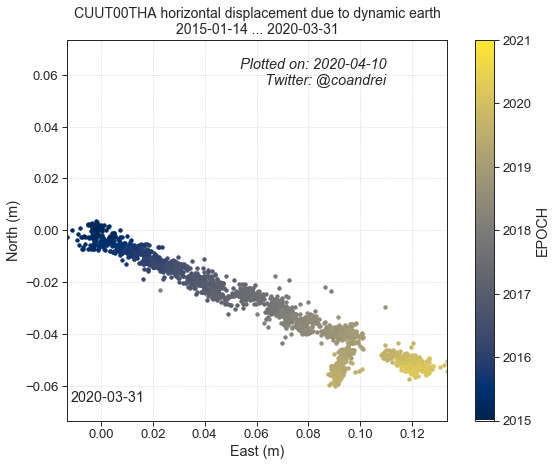

In [10]:
import matplotlib.animation as animation
# dynamic plot
def do_dynamic(df):
    
    t = df.index                 # dates
    x = df['EAST']               # east-coord
    y = df['NORTH']              # north-coord 
    cmap = plt.cm.cividis
    
    vmin = df.index.min().year
    vmax = df.index.max().year + 1
    colors = [cmap((val - vmin) / (vmax - vmin)) for val in df['EPOCH']]
    
    print(vmin, df.index[1].toordinal(), vmax, t.size)
    
    
    # initialize the main frame
    fig, ax2 = plt.subplots()
    
    fig.set_size_inches(10, 7)
    ax2.grid(linestyle=':')
    ax2.set_aspect('equal')
    dx = x.max() - x.min()
    ax2.set_ylim(-dx/2.0, dx/2.0)
    ax2.set_xlim(x.min(), x.max())
    ax2.set_xlabel('East (m)')
    ax2.set_ylabel('North (m)')
    title = 'CUUT00THA horizontal displacement due to dynamic earth\n'
    title = title + t[0].strftime("%Y-%m-%d") + ' ... ' + t[-1].strftime("%Y-%m-%d")
    ax2.set_title(title, fontsize=14)
    
    
    #initialize scatter plot and colormap
    sc = ax2.scatter([], [], s=20, c=[], cmap=cmap)
    sc.set_clim([vmin, vmax])
    
    
    # add color bar 
    cb = fig.colorbar(sc)
    cb.set_label('EPOCH')
    
    # date text label
    xt, yt = ax2.get_xlim()[0], ax2.get_ylim()[0]
    txt = ax2.text(xt*.9, yt*.9, t[-1].strftime('%Y-%m-%d'))
    
    txt2 = 'Plotted on: {}\nTwitter: @coandrei'
    ax2.text(0.11,0.055,#0.015,-0.017, #
             txt2.format(pd.datetime.now().strftime("%Y-%m-%d")),
             ha='right', va='bottom', 
             fontstyle='italic')
    
    
#     # insert watermark 
#     fig.text(0.5, 0.5, 'Copyright',
#              fontsize=90, color='gray',
#              ha='center', va='center', alpha=0.1, rotation=45)
    
    # initialization function
    def init():
        txt.set_text(t[0].strftime('%Y-%m-%d'))
        #sc = ax2.scatter([], [])
        #lines.set_data([], [])
        
        return txt,
    
    # animation function
    def animate(i):
        plt.scatter(x[i], y[i], marker='.', s=50, color=colors[i])
        txt.set_text(t[i].strftime('%Y-%m-%d'))

        return  txt, 
    
    step = 1
    steps = np.arange(0, t.size, step)

    # call the animator
    anim = animation.FuncAnimation(
        fig, 
        func=animate, 
        frames=steps, 
        init_func=init,
        interval=30,
        blit=True,
    )
    
    return anim

anim = do_dynamic(df[:])

# save the animation
# anim.save('cuut_anime4.mp4', writer='ffmpeg', fps=10, dpi=100, metadata={'title':'CUUT00THA'})
anim.save('cuut_anime4.mp4')

**Notice**

Plotting every single day leads to increased number of frames thus longer time (10-12 minutes) to create the animation.<br>
Feel free to experiment and find what is best for your needs.
